* we assume a parametric form for the true distribution; we're not looking into model mis-specification
* the Bayesian derivation uses a "vague prior"
* the decision rule for prediction is the same for ERM/ Bayesian (changing his notation for predicted value: $\hat{x}$ instead of $\theta$): indeed we predict $x^*=\arg\min_{\hat{x}} \int L(\text{truth } x, \text{prediction } \hat{x}) p(x|D)$. Since $p(x|D)$ is always a Gaussian, and we deal with $L_1$ and $L_2$ loss only, we predict the predictive distribution's mean $m$. What varies is the learning method, not the prediction DR.
 
### Example 1
ERM: $m^*_{ERM}=\arg\min_m ER(m)=\arg\min_m \sum_D L(x_n, m)$ (prediction is always $m$) uses $L_2$, so minimized by choosing $m=$ sample mean.
 
### Example 2
ERM: ER uses $L_1$ so minimized by $m=$ sample median.
Bayesian: $p(x|D)$ appearing in DR is $p(x|D)=\int_m p(x|m) p(m|D) dm$ where
 
* $p(x|m)=N(x|m,1)$
* $p(m|D) \propto p(D|m) p(m) \propto \prod_D p(x_n|m)$ (vague prior), so $p(m|D) = N(m|\bar{x}, \sigma_{m|D})$
 
hence $p(x|D)=N(x|\bar{x},\sigma_{x|D})$, will predict mean of this: sample mean.
 
### Example 3
ERM: $L_2$ hence learn $m^{*}=$ sample mean.
 
## Remarks
 
* Minka computes the expected loss in each trial; otbained by averaging over unseen $x$'s, a very frequentist thing to do ironically :-)
* in effect he's testing the large-sample behaviour of the estimator, by fixing $m$ and varying $D$
* why ERM less efficient than Bayesian? Bayesian achieves min Bayes risk.
* any advantages of ERM here (other than no reliance on prior specification)? eg better generalization bounds, or better behaviour in case of model mis-specification? or under minimax considerations?

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
%matplotlib inline

In [26]:
import numpy as np

from ezplot import figure, show
from pybo import solve_bayesopt
from pybo.utils import InteractiveQuery
import pybo.init_model

In [92]:
import IPython.display
def test(xnext, xbest, model, info):
    mu, s2 = model.predict(x[:, None])

    # plot the final model
    fig = figure(tight_layout=False) # tight to suppress warning
    axs = fig.gca()
    axs.plot_banded(x, mu, 2*np.sqrt(s2))
    axs.axvline(xnext, color='g')
    if xbest != None:
        axs.axvline(xbest, color='r')
    axs.scatter(info.x.ravel(), info.y)
#    fig.canvas.draw()
    IPython.display.clear_output(wait=True)
    IPython.display.display(fig)


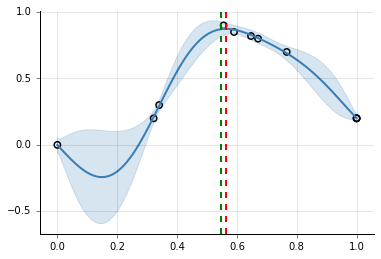

KeyboardInterrupt: 

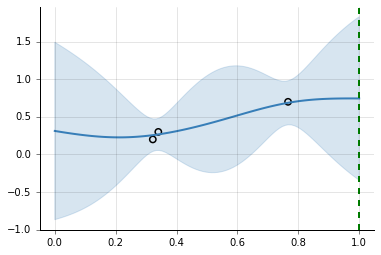

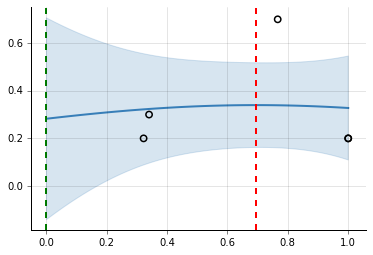

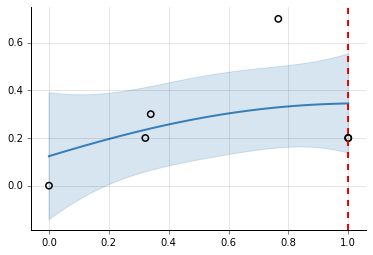

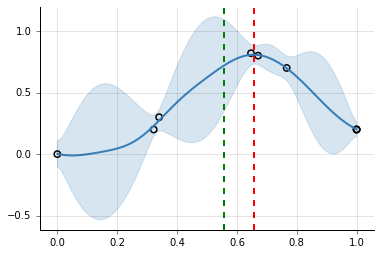

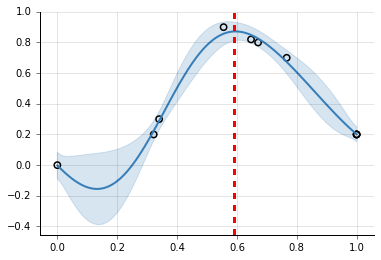

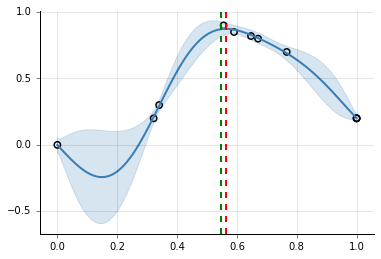

In [96]:
f = InteractiveQuery()
#f = lambda _x : _x[0]*(1-_x[0])
bounds = [0, 1]
x = np.linspace(bounds[0], bounds[1], 100)

# optimize the model and get final predictions
xbest, model, info = solve_bayesopt(f, bounds, niter=100, callback=test, )

# Changes from original
- made several changes to run under Py3 (few on Reggie)
- could send them back to Matt
- inspiration from interactive demo, but had to change several things
    - to start with, prompted input broken: result is string, current code will break and say "not a number"
    - bayesopt.py.solve_model doc speaks of callback , but code has none: built it in
    - pass info from init_model, so that plot can also represent the init points, not just the points elicited after initialization
    - had to fix tight_layout business
    
# NOW
* using InteractiveQuery will ask for values, 
* while using function will just query that function
* plot green line: next x to be elicited, red line: best x so far
* use IPython.display in order to update the current plot, instead of appending a new plot [for some reason, when function finishes, this will display all the plots in the cell]

*NB is is possible to use the init points just for hypers, and not do model.add_data on them?*